In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

## Species_info Dataset

In [184]:
species.head(15)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [185]:
species.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [186]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [187]:
species.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

In [188]:
species.duplicated().value_counts()

False    5824
dtype: int64

In [189]:
species.duplicated(subset=['scientific_name']).value_counts()

False    5541
True      283
dtype: int64

In [190]:
species.duplicated(subset=['common_names']).value_counts()

False    5504
True      320
dtype: int64

## Visualizing Duplicates

I want to visualize the duplicated rows, especially those that contain conservation status data to ensure there will be no information lost when the duplicates are dropped. I know the common names are not consistent across duplicates in the scientific name, so I can only assume the conservation data will also have inconsistencies across all the duplicates of a species. 

In [191]:
duplicates = species.duplicated(subset=['scientific_name'], keep=False)

In [192]:
duplicates_list = []
for i in range(len(duplicates)):
    if duplicates[i] == True:
        duplicates_list.append(duplicates.loc[[i]])

In [193]:
duplicates_df = pd.concat(duplicates_list).reset_index()

In [194]:
duplicates_df.head()

,index,0
0,4,True
1,5,True
2,6,True
3,8,True
4,10,True


In [195]:
duplicates_index = duplicates_df['index'].tolist()

In [196]:
duplicates_rows = []
for index in duplicates_index:
    data = species.iloc[[index]]
    duplicates_rows.append(data)

In [197]:
duplicates_rows_df = pd.concat(duplicates_rows)

In [198]:
duplicates_rows_df = duplicates_rows_df.sort_values('scientific_name')

In [199]:
duplicates_rows_df_dropped = duplicates_rows_df.dropna(subset='conservation_status')

In [200]:
duplicates_rows_df_dropped

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
3035,Mammal,Eptesicus fuscus,"Big Brown Bat, Big Brown Bat",Species of Concern
3150,Bird,Gavia immer,"Common Loon, Great Northern Diver, Great North...",Species of Concern
172,Bird,Gavia immer,Common Loon,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern
3037,Mammal,Lasionycteris noctivagans,"Silver-Haired Bat, Silver-Haired Bat",Species of Concern
4465,Mammal,Myotis californicus,California Myotis,Species of Concern


In [201]:
species[species.scientific_name == 'Oncorhynchus mykiss']

,category,scientific_name,common_names,conservation_status
560,Fish,Oncorhynchus mykiss,Rainbow Trout,NaN
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened


### Findings

Now I can see that ***Canus lupus*** is marked as endangered in two rows and in recovery in a third. This would require verification to determine the most accurate conservation status for this species before the rows can be dropped.

I also see that only one ***Oncorhynchus mykiss*** record is present in my duplicates with conservation status data so I went looking for the other in the full species data set and found a second instance with no conservation data. This will also need to be verified for accuracy.

For this analysis, I will err on the side of caution and assume the species mentioned above are at risk and therefore drop the in recovery (index 3020) and blank conservation status (index 560) rows for the respective species. 

I am satisfied that no information will be lost by dropping duplicates in scientific_name.

In [202]:
species = species.drop([3020, 560])

In [203]:
species.duplicated(subset=['scientific_name']).value_counts()

False    5541
True      281
dtype: int64

In [204]:
species = species.drop_duplicates(subset=['scientific_name'])
species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


## Creating Genus Variable

It may be helpful later in the analysis to have a variable containing only the genus of the species

In [205]:
string_split = species['scientific_name'].str.split(' ')
species['genus'] = string_split.str.get(0)

In [206]:
species.head(10)

,category,scientific_name,common_names,conservation_status,genus
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Clethrionomys
1,Mammal,Bos bison,"American Bison, Bison",NaN,Bos
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN,Bos
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN,Ovis
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN,Cervus
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN,Odocoileus
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN,Sus
7,Mammal,Canis latrans,Coyote,Species of Concern,Canis
8,Mammal,Canis lupus,Gray Wolf,Endangered,Canis
9,Mammal,Canis rufus,Red Wolf,Endangered,Canis


In [207]:
species.columns.tolist()

['category', 'scientific_name', 'common_names', 'conservation_status', 'genus']

In [208]:
species = species[['category', 'scientific_name', 'genus', 'common_names', 'conservation_status']]

In [209]:
species.head(10)

,category,scientific_name,genus,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Clethrionomys,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,Bos,"American Bison, Bison",NaN
2,Mammal,Bos taurus,Bos,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,Ovis,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Cervus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,Odocoileus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,Sus,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Canis,Coyote,Species of Concern
8,Mammal,Canis lupus,Canis,Gray Wolf,Endangered
9,Mammal,Canis rufus,Canis,Red Wolf,Endangered


## Exploratory Data Analysis

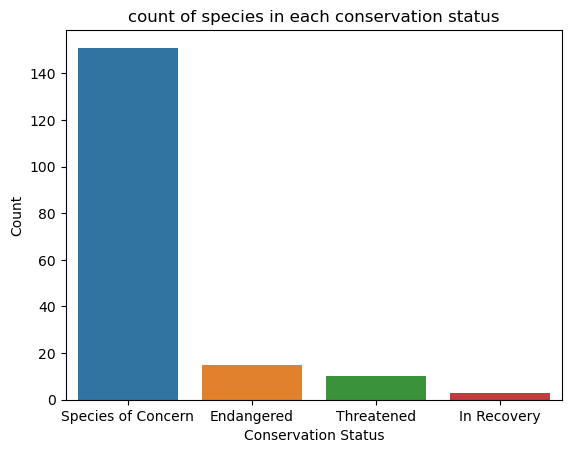

In [295]:
sns.countplot(data = species, x ='conservation_status')
plt.title('count of species in each conservation status')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.show()
plt.close()

In [228]:
conservation_bycat = pd.crosstab(species.conservation_status, species.category)
conservation_bycat

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1,4,3,6,0,0,1
In Recovery,0,3,0,0,0,0,0
Species of Concern,4,68,4,22,5,5,43
Threatened,2,0,4,2,0,0,2


In [254]:
round(conservation_bycat/179,3)

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,0.006,0.022,0.017,0.034,0.000,0.000,0.006
In Recovery,0.000,0.017,0.000,0.000,0.000,0.000,0.000
Species of Concern,0.022,0.380,0.022,0.123,0.028,0.028,0.240
Threatened,0.011,0.000,0.022,0.011,0.000,0.000,0.011


<Axes: xlabel='conservation_status', ylabel='count'>

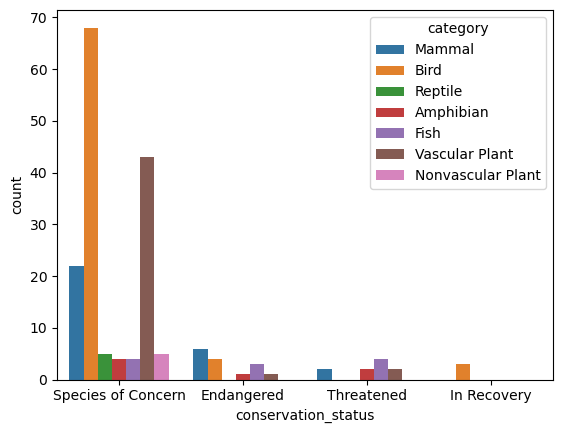

In [222]:
sns.countplot(data = species, x ='conservation_status', hue='category')

In [255]:
species_concern = species[species.conservation_status == 'Species of Concern']
species_concern.head(10)

,category,scientific_name,genus,common_names,conservation_status
7,Mammal,Canis latrans,Canis,Coyote,Species of Concern
29,Mammal,Eptesicus fuscus,Eptesicus,Big Brown Bat,Species of Concern
30,Mammal,Lasionycteris noctivagans,Lasionycteris,Silver-Haired Bat,Species of Concern
33,Mammal,Myotis austroriparius,Myotis,"Mississippi Myotis, Southeastern Myotis",Species of Concern
35,Mammal,Myotis keenii,Myotis,Keen's Myotis,Species of Concern
36,Mammal,Myotis leibii,Myotis,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern
37,Mammal,Myotis lucifugus,Myotis,"Little Brown Bat, Little Brown Myotis",Species of Concern
91,Bird,Accipiter cooperii,Accipiter,Cooper's Hawk,Species of Concern
93,Bird,Accipiter striatus,Accipiter,Sharp-Shinned Hawk,Species of Concern
94,Bird,Aquila chrysaetos,Aquila,Golden Eagle,Species of Concern


In [258]:
species_danger_threat = species[(species.conservation_status == 'Endangered') |(species.conservation_status == 'Threatened')]
species_danger_threat.head(10)

,category,scientific_name,genus,common_names,conservation_status
8,Mammal,Canis lupus,Canis,Gray Wolf,Endangered
9,Mammal,Canis rufus,Canis,Red Wolf,Endangered
34,Mammal,Myotis grisescens,Myotis,Gray Myotis,Endangered
38,Mammal,Myotis septentrionalis,Myotis,"Northern Long-Eared Bat, Northern Myotis",Threatened
39,Mammal,Myotis sodalis,Myotis,"Indiana Bat, Indiana Or Social Myotis",Endangered
72,Mammal,Glaucomys sabrinus coloratus,Glaucomys,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered
173,Bird,Grus americana,Grus,Whooping Crane,Endangered
276,Bird,Vermivora bachmanii,Vermivora,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
343,Bird,Picoides borealis,Picoides,Red-Cockaded Woodpecker,Endangered
490,Fish,Erimonax monachus,Erimonax,Spotfin Chub,Threatened


In [260]:
print(len(species_concern))
print(len(species_danger_threat))

151
25


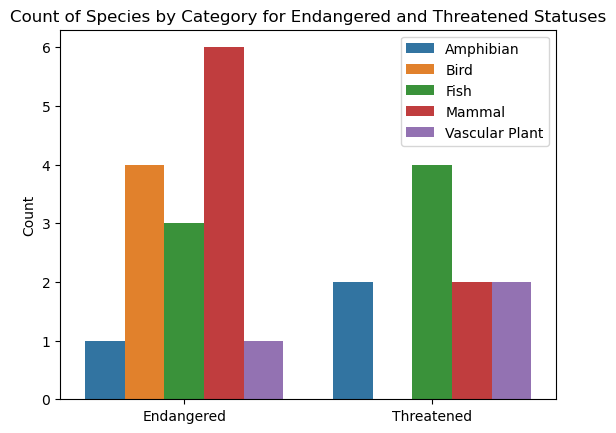

<Figure size 640x480 with 0 Axes>

In [279]:
sns.countplot(data = species_danger_threat, x ='conservation_status', hue='category')
plt.legend(loc=0)
plt.title('Count of Species by Category for Endangered and Threatened Statuses')
plt.xlabel('')
plt.ylabel('Count')
plt.show()
plt.clf()

In [267]:
species_danger_threat = species_danger_threat[['conservation_status','category', 'scientific_name','common_names']]
species_danger_threat = species_danger_threat.sort_values(by=['conservation_status','category','scientific_name'])
species_danger_threat

,conservation_status,category,scientific_name,common_names
4601,Endangered,Amphibian,Rana sierrae,Sierra Nevada Yellow-Legged Frog
173,Endangered,Bird,Grus americana,Whooping Crane
4505,Endangered,Bird,Gymnogyps californianus,California Condor
343,Endangered,Bird,Picoides borealis,Red-Cockaded Woodpecker
276,Endangered,Bird,Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler"
3275,Endangered,Fish,Chasmistes liorus,June Sucker
540,Endangered,Fish,Etheostoma percnurum,Duskytail Darter
570,Endangered,Fish,Noturus baileyi,Smoky Madtom
8,Endangered,Mammal,Canis lupus,Gray Wolf
9,Endangered,Mammal,Canis rufus,Red Wolf


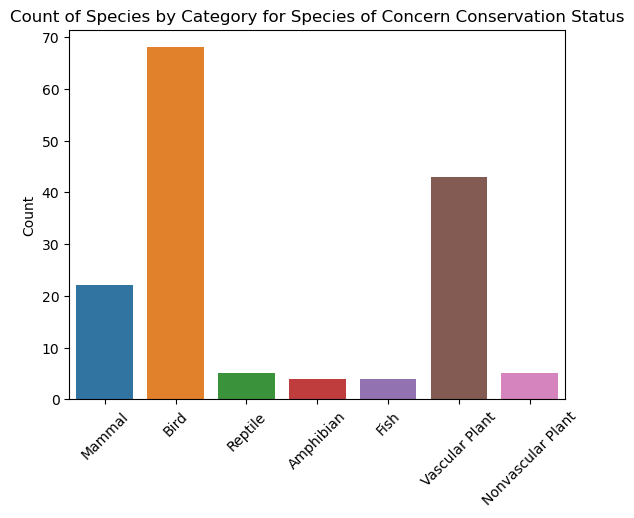

<Figure size 640x480 with 0 Axes>

In [280]:
sns.countplot(data = species_concern, x ='category')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Count')
plt.title('Count of Species by Category for Species of Concern Conservation Status')
plt.show()
plt.clf()

In [296]:
concern_birds = species_concern[species_concern.category == 'Bird']
concern_birds.groupby(['genus']).count().sort_values('conservation_status',ascending=False).head(10)

,category,scientific_name,common_names,conservation_status
genus,,,,
Falco,3,3,3,3
Accipiter,2,2,2,2
Buteo,2,2,2,2
Asio,2,2,2,2
Sphyrapicus,2,2,2,2
Picoides,1,1,1,1
Pica,1,1,1,1
Phalacrocorax,1,1,1,1
Phainopepla,1,1,1,1


In [290]:
concern_vasplant = species_concern[species_concern.category == 'Vascular Plant']
concern_vasplant.groupby(['genus']).count().sort_values('conservation_status',ascending=False).head(10)

,category,scientific_name,common_names,conservation_status
genus,,,,
Mimulus,2,2,2,2
Abies,1,1,1,1
Romneya,1,1,1,1
Monotropa,1,1,1,1
Monotropsis,1,1,1,1
Najas,1,1,1,1
Parnassia,1,1,1,1
Parthenium,1,1,1,1
Plagiobothrys,1,1,1,1


In [291]:
concern_mammal = species_concern[species_concern.category == 'Mammal']
concern_mammal.groupby(['genus']).count().sort_values('conservation_status',ascending=False).head(10)

,category,scientific_name,common_names,conservation_status
genus,,,,
Myotis,9,9,9,9
Antrozous,1,1,1,1
Aplodontia,1,1,1,1
Bassariscus,1,1,1,1
Canis,1,1,1,1
Eptesicus,1,1,1,1
Euderma,1,1,1,1
Lasionycteris,1,1,1,1
Lasiurus,1,1,1,1


### Findings

9 species of genus Myotis are considered species of concern! What is going on with the mouse-eared bats!! That definitely requires more research as to what is causing this.

Additionally, 3 species of Falco on this list might require some looking into.

We could also look more broadly to see if there are more patterns at the Family level.

Also a lot of birds and vascualr plants in general are on this list, which could be another area of research.

## Observations Dataset

In [297]:
observations.head(15)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [300]:
observations.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [301]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [302]:
observations.duplicated().value_counts()

False    23281
True        15
dtype: int64

In [309]:
observations = observations.drop_duplicates()

In [310]:
observations.park_name.value_counts()

Bryce National Park                    5823
Yosemite National Park                 5821
Yellowstone National Park              5819
Great Smoky Mountains National Park    5818
Name: park_name, dtype: int64

In [321]:
#Bryce_NP = []
#Yosemite_NP = []
#Yellowstone_NP = []
#GSM_NP = []

#for row in observations:
#    if observations[observations.park_name == 'Bryce National Park']:
#       Bryce_NP.append(row)
#    if observations[observations.park_name == 'Yosemite National Park']:
#       Yosemite_NP.append(row)
#    if observations[observations.park_name == 'Yellowstone National Park']:
#       Yellowstone_NP.append(row)
#   if observations[observations.park_name == 'Great Smoky Mountains National Park']:
#       GSM_NP.append(row)

#Bryce_df = pd.concat(Bryce_NP)
#Yosemite_df = pd.concat(Yosemite_NP)
#Yellowstone_df = pd.concat(Yellowstone_NP)
#GSM_df = pd.concat(GSM_NP)

In [320]:
Bryce_NP = observations[observations.park_name == 'Bryce National Park']
Yosemite_NP  = observations[observations.park_name == 'Yosemite National Park']
Yellowstone_NP = observations[observations.park_name == 'Yellowstone National Park']
GSM_NP = observations[observations.park_name == 'Great Smoky Mountains National Park']

In [322]:
print(len(Bryce_NP))
print(len(Yosemite_NP))
print(len(Yellowstone_NP))
print(len(GSM_NP))

5823
5821
5819
5818


In [323]:
Bryce_NP.duplicated().value_counts()

False    5823
dtype: int64

In [324]:
Yosemite_NP.duplicated().value_counts()

False    5821
dtype: int64

In [325]:
Yellowstone_NP.duplicated().value_counts()

False    5819
dtype: int64

In [326]:
GSM_NP.duplicated().value_counts()

False    5818
dtype: int64

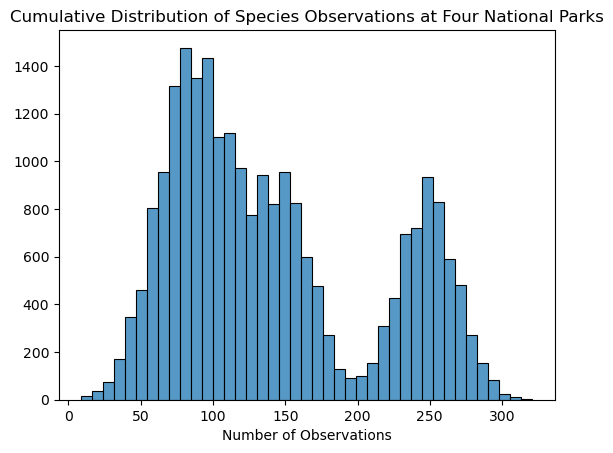

In [335]:
sns.histplot(data=observations, x='observations')
plt.title('Cumulative Distribution of Species Observations at Four National Parks')
plt.ylabel('')
plt.xlabel('Number of Observations')
plt.show()

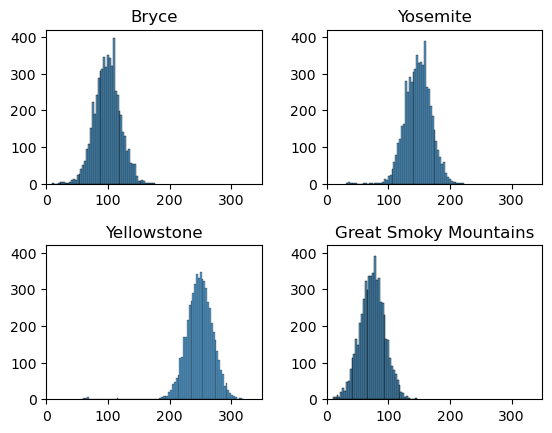

In [362]:
plt.figure()
plt.subplot(2,2,1)
sns.histplot(data=Bryce_NP, x='observations')
plt.title('Bryce')
plt.xlabel('')
plt.ylabel('')
plt.axis([0,350,0,420])
plt.subplot(2,2,2)
sns.histplot(data=Yosemite_NP, x='observations')
plt.title('Yosemite')
plt.xlabel('')
plt.ylabel('')
plt.axis([0,350,0,420])
plt.subplots_adjust(wspace=0.3)
plt.subplot(2,2,3)
sns.histplot(data=Yellowstone_NP, x='observations')
plt.title('Yellowstone')
plt.xlabel('')
plt.ylabel('')
plt.axis([0,350,0,420])
plt.subplots_adjust(hspace=0.4)
plt.subplot(2,2,4)
sns.histplot(data=GSM_NP, x='observations')
plt.title('Great Smoky Mountains')
plt.ylabel('')
plt.xlabel('')
plt.axis([0,350,0,420])
plt.show()

Yellowstone has many individuals of many species (high counts and high observations)
All the other parks have fewer individuals but a similar number of different species that are present in Yellowstone (high counts and mid to low observations)

This accounts for the bimodal nature of the cumulative histogram.

In [383]:
species_sn = species.scientific_name.sort_values(ascending=True).reset_index(drop=True)
observations_sn = observations.scientific_name.drop_duplicates().sort_values(ascending=True).reset_index(drop=True)

In [384]:
print(species_sn)

0                             Abies bifolia
1                            Abies concolor
2                             Abies fraseri
3                      Abietinella abietina
4                         Abronia ammophila
                       ...                 
5536        Zonotrichia leucophrys gambelii
5537        Zonotrichia leucophrys oriantha
5538                    Zonotrichia querula
5539                   Zygodon viridissimus
5540    Zygodon viridissimus var. rupestris
Name: scientific_name, Length: 5541, dtype: object


In [385]:
print(observations_sn)

0                             Abies bifolia
1                            Abies concolor
2                             Abies fraseri
3                      Abietinella abietina
4                         Abronia ammophila
                       ...                 
5536        Zonotrichia leucophrys gambelii
5537        Zonotrichia leucophrys oriantha
5538                    Zonotrichia querula
5539                   Zygodon viridissimus
5540    Zygodon viridissimus var. rupestris
Name: scientific_name, Length: 5541, dtype: object


In [386]:
species_sn.compare(observations_sn)

,self,other


From this I see that all the same species are present in both data sets

In [395]:
observations = observations[['scientific_name','park_name','observations']]

In [396]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [388]:
species.head()

,category,scientific_name,genus,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Clethrionomys,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,Bos,"American Bison, Bison",NaN
2,Mammal,Bos taurus,Bos,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,Ovis,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Cervus,Wapiti Or Elk,NaN


In [407]:
merged_data = pd.merge(observations, species, on='scientific_name', how='inner')

In [408]:
merged_data.head(10)

,scientific_name,park_name,observations,category,genus,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,Vicia,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,Vicia,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,Vicia,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,Vicia,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,Neovison,American Mink,NaN
5,Neovison vison,Yellowstone National Park,218,Mammal,Neovison,American Mink,NaN
6,Neovison vison,Bryce National Park,91,Mammal,Neovison,American Mink,NaN
7,Neovison vison,Yosemite National Park,200,Mammal,Neovison,American Mink,NaN
8,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Prunus,Klamath Plum,NaN
9,Prunus subcordata,Yellowstone National Park,217,Vascular Plant,Prunus,Klamath Plum,NaN


In [409]:
merged_data = merged_data[['scientific_name','park_name','observations','conservation_status']]
merged_data.head(10)

,scientific_name,park_name,observations,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,NaN
1,Vicia benghalensis,Yosemite National Park,148,NaN
2,Vicia benghalensis,Yellowstone National Park,247,NaN
3,Vicia benghalensis,Bryce National Park,104,NaN
4,Neovison vison,Great Smoky Mountains National Park,77,NaN
5,Neovison vison,Yellowstone National Park,218,NaN
6,Neovison vison,Bryce National Park,91,NaN
7,Neovison vison,Yosemite National Park,200,NaN
8,Prunus subcordata,Yosemite National Park,138,NaN
9,Prunus subcordata,Yellowstone National Park,217,NaN


In [412]:
merged_data_dropped = merged_data.dropna(subset='conservation_status').reset_index(drop=True)

In [413]:
merged_data_dropped.head(10)

,scientific_name,park_name,observations,conservation_status
0,Zizia trifoliata,Yosemite National Park,135,Species of Concern
1,Zizia trifoliata,Yellowstone National Park,238,Species of Concern
2,Zizia trifoliata,Bryce National Park,87,Species of Concern
3,Zizia trifoliata,Great Smoky Mountains National Park,80,Species of Concern
4,Camissonia sierrae ssp. alticola,Bryce National Park,84,Species of Concern
5,Camissonia sierrae ssp. alticola,Yosemite National Park,169,Species of Concern
6,Camissonia sierrae ssp. alticola,Great Smoky Mountains National Park,95,Species of Concern
7,Camissonia sierrae ssp. alticola,Yellowstone National Park,201,Species of Concern
8,Tofieldia glabra,Great Smoky Mountains National Park,75,Species of Concern
9,Tofieldia glabra,Yellowstone National Park,220,Species of Concern


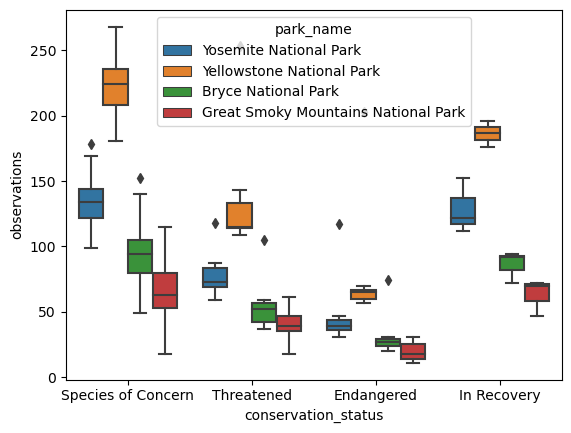

<Figure size 640x480 with 0 Axes>

In [436]:
sns.boxplot(data=merged_data_dropped, x='conservation_status', y='observations', hue='park_name')
#plt.legend(['Yosemite','Yellowstone','Bryce','Great Smoky Mountains'])
plt.show()
plt.clf()

The visualization shows continuously decreasing numbers of observations as the conservation status becomes more severe: of concern > threatened > endangered, and in recovery somewhere in the middle.

At every level of conservation status we see the same pattern regarding the four parks: Yellowstone with the most observations, then Yosemite, Bryce and finally Great Smoky Mountains. Is this related to anything? The most obvious guess would be the size of each park - a larger park would likely contain more wildlife.

The sizes of the parks are as follows:
Yellowstone: 8,983.18 km2
Yosemite:3,074.1 km2
Bryce: 145.02 km2
Great Smoky Mountains: 2,114.15 km2

As we can see this explanation is not the whole story. Yellowstone is by far the largest park with Yosemite next in line, but Bryce is very small compared to GSM, despite having many more observations of every level of species! Perhaps the location of the parks impacts the species of wildlife present in that area.

Yellowstone is mostly in Wyoming
Yosemite is in California
Bryce is in Utah
GSM is in Tennesee and North Carolina

As you can see from the map in the repository folder entitled 'map.pdf' GSM is the outlier on the eastern United States, while the other three are on the western side of the country, which has a very different climate and ecology. Perhaps this is the explanation as to why GSM has such low observation numbers despite being a relatively large park, and considerably larger than Bryce.